# Apprentissage supervisé - Multiple Regression Linéaire

Nous avons vu précédemment la régression linéaire simple, via les modèles `LinearRegression` et `HuberRegression`, toutefois si nos tests ont très bien fonctionné, il est rare que nos régressions soient simples dans le monde réel, les problèmes sont plus complexes et donc impliquent plus de variables (features).

Etant donné que nous sommes toujours dans le cas d'une régression nos données doivent toujours être **numériques quantitatives**.

![Image regression](../_images/regression.jpg)
Notre but est toujours de trouver la courbe passant par le plus de points, mais cette fois-ci avec plusieurs features (entrées).

## Multiple Regression Linéaire

Beaucoup plus utilisée donc, la régression linéaire multiple consiste à trouver la droite répondant à l'équation suivante :
$$ y = a_1x_1 + a_2x_2 + … + a_nx_n + b $$
A partir de notre jeu de données qui ressemble à quelque chose comme ceci
![Image regression](../_images/dataframe-linear-multiple.jpg)

Pour les outils, on ne change pas par rapport à tout à la régression linéaire simple, on va donc utiliser :
- numpy
- pandas
- matplotlib.pyplot
- scikit-learn
(voir les précédentes pratiques si vous avez oublié à quoi ils servent)

Quant au dataset, nous allons changer de fichier, mais rester dans le même thème. Cette fois nous allons essayer de trouver la valeur d'un crédit immobilier accordé à une personne en fonction de critières définis.

# Avant-propos - Pour les utilisateurs de Google colab

Petit apparté pour les utilisateurs de google colab. Pour utiliser la méthode `pd.read_csv()`, il faudra rajouter quelques lignes de codes supplémentaires pour pouvoir charger un fichier, les voici.

```python
# Première cellule jupyter
from google.colab import files
uploaded = files.upload()
```

```python
# Seconde cellule jupyter
import io
# Très important : le nom du fichier passé en paramètre de la fonction "uploaded" doit avoir le même nom que le fichier que vous avez uploadé
df = pd.read_csv(io.BytesIO(uploaded['nom-du-fichier-uploader.csv']))
```

- [Voir plus  d'informations sur le chargement de fichiers externes avec Google colab](https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92)

# Phase 1 : Chargement des données

In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

credit_df_src = pd.read_csv("credit-immo.csv")
# On garde une copie du dataset
credit_df = credit_df_src.copy()

On remarque donc que notre jeu de données est composé de quatre colonnes. Notre régression sera donc multiple, nous cherchonsà trouver la valeur de la colonne "loan" (crédit en français). Notre équation sera donc de la forme suivante :
$$ loan = a_1(age) + a_2(creditrating) + a3(children) + b $$
scikit-learn va nous aider à trouver les valeurs de "a1-3" et "b". 

On remarque également que nos clés sont en anglais, nous allons donc les renommer en français dans la phase 2 : exploration des données

# Phase 2 : Exploration des données

On essaye de se poser des questions pour mieux connaître notre jeu de données :
- Est-ce qu'il y a des données manquantes ? `df.isnull().sum()`
- Est-ce que le format de données est correct ? `df.dtypes`
- Quels sont les données statistiques que nous pouvons sortir de notre dataset ? `df.describe()`


## A vous de coder

Mais avant on renomme nos colonnes grâce à pandas.
- [Documentation de la méthode `rename` de pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)

In [40]:
# Premiere étape renommage des colonnes
# - age -> age
# - credit-rating -> note-de-credit
# - children -> nombre-d-enfants
# - loan -> credit-immobilier

credit_df.rename(
    columns={"credit-rating": "note-de-credit", "children": "nombre-d-enfants", "loan": "credit-immo"}, 
    inplace=True
)

# Est-ce qu'il y a des données manquantes ?

# Est-ce que le format de données est correct ?

# Quels sont les données statistiques que nous pouvons sortir de notre dataset ? 

Vu que nous savons maintenant faire des graphiques, nous allons essayer de modéliser tout ça. Vu que nous sommes dans un cas avec plusieurs colonnes, nous allons de voir changer de graphiques, pas de nuage de points ici mais un nuage de points 3D, nous pouvons donc afficher 3 colonnes, et pour la dernière nous allons jouer sur des nuances de couleurs pour gérer la quatrième colonne

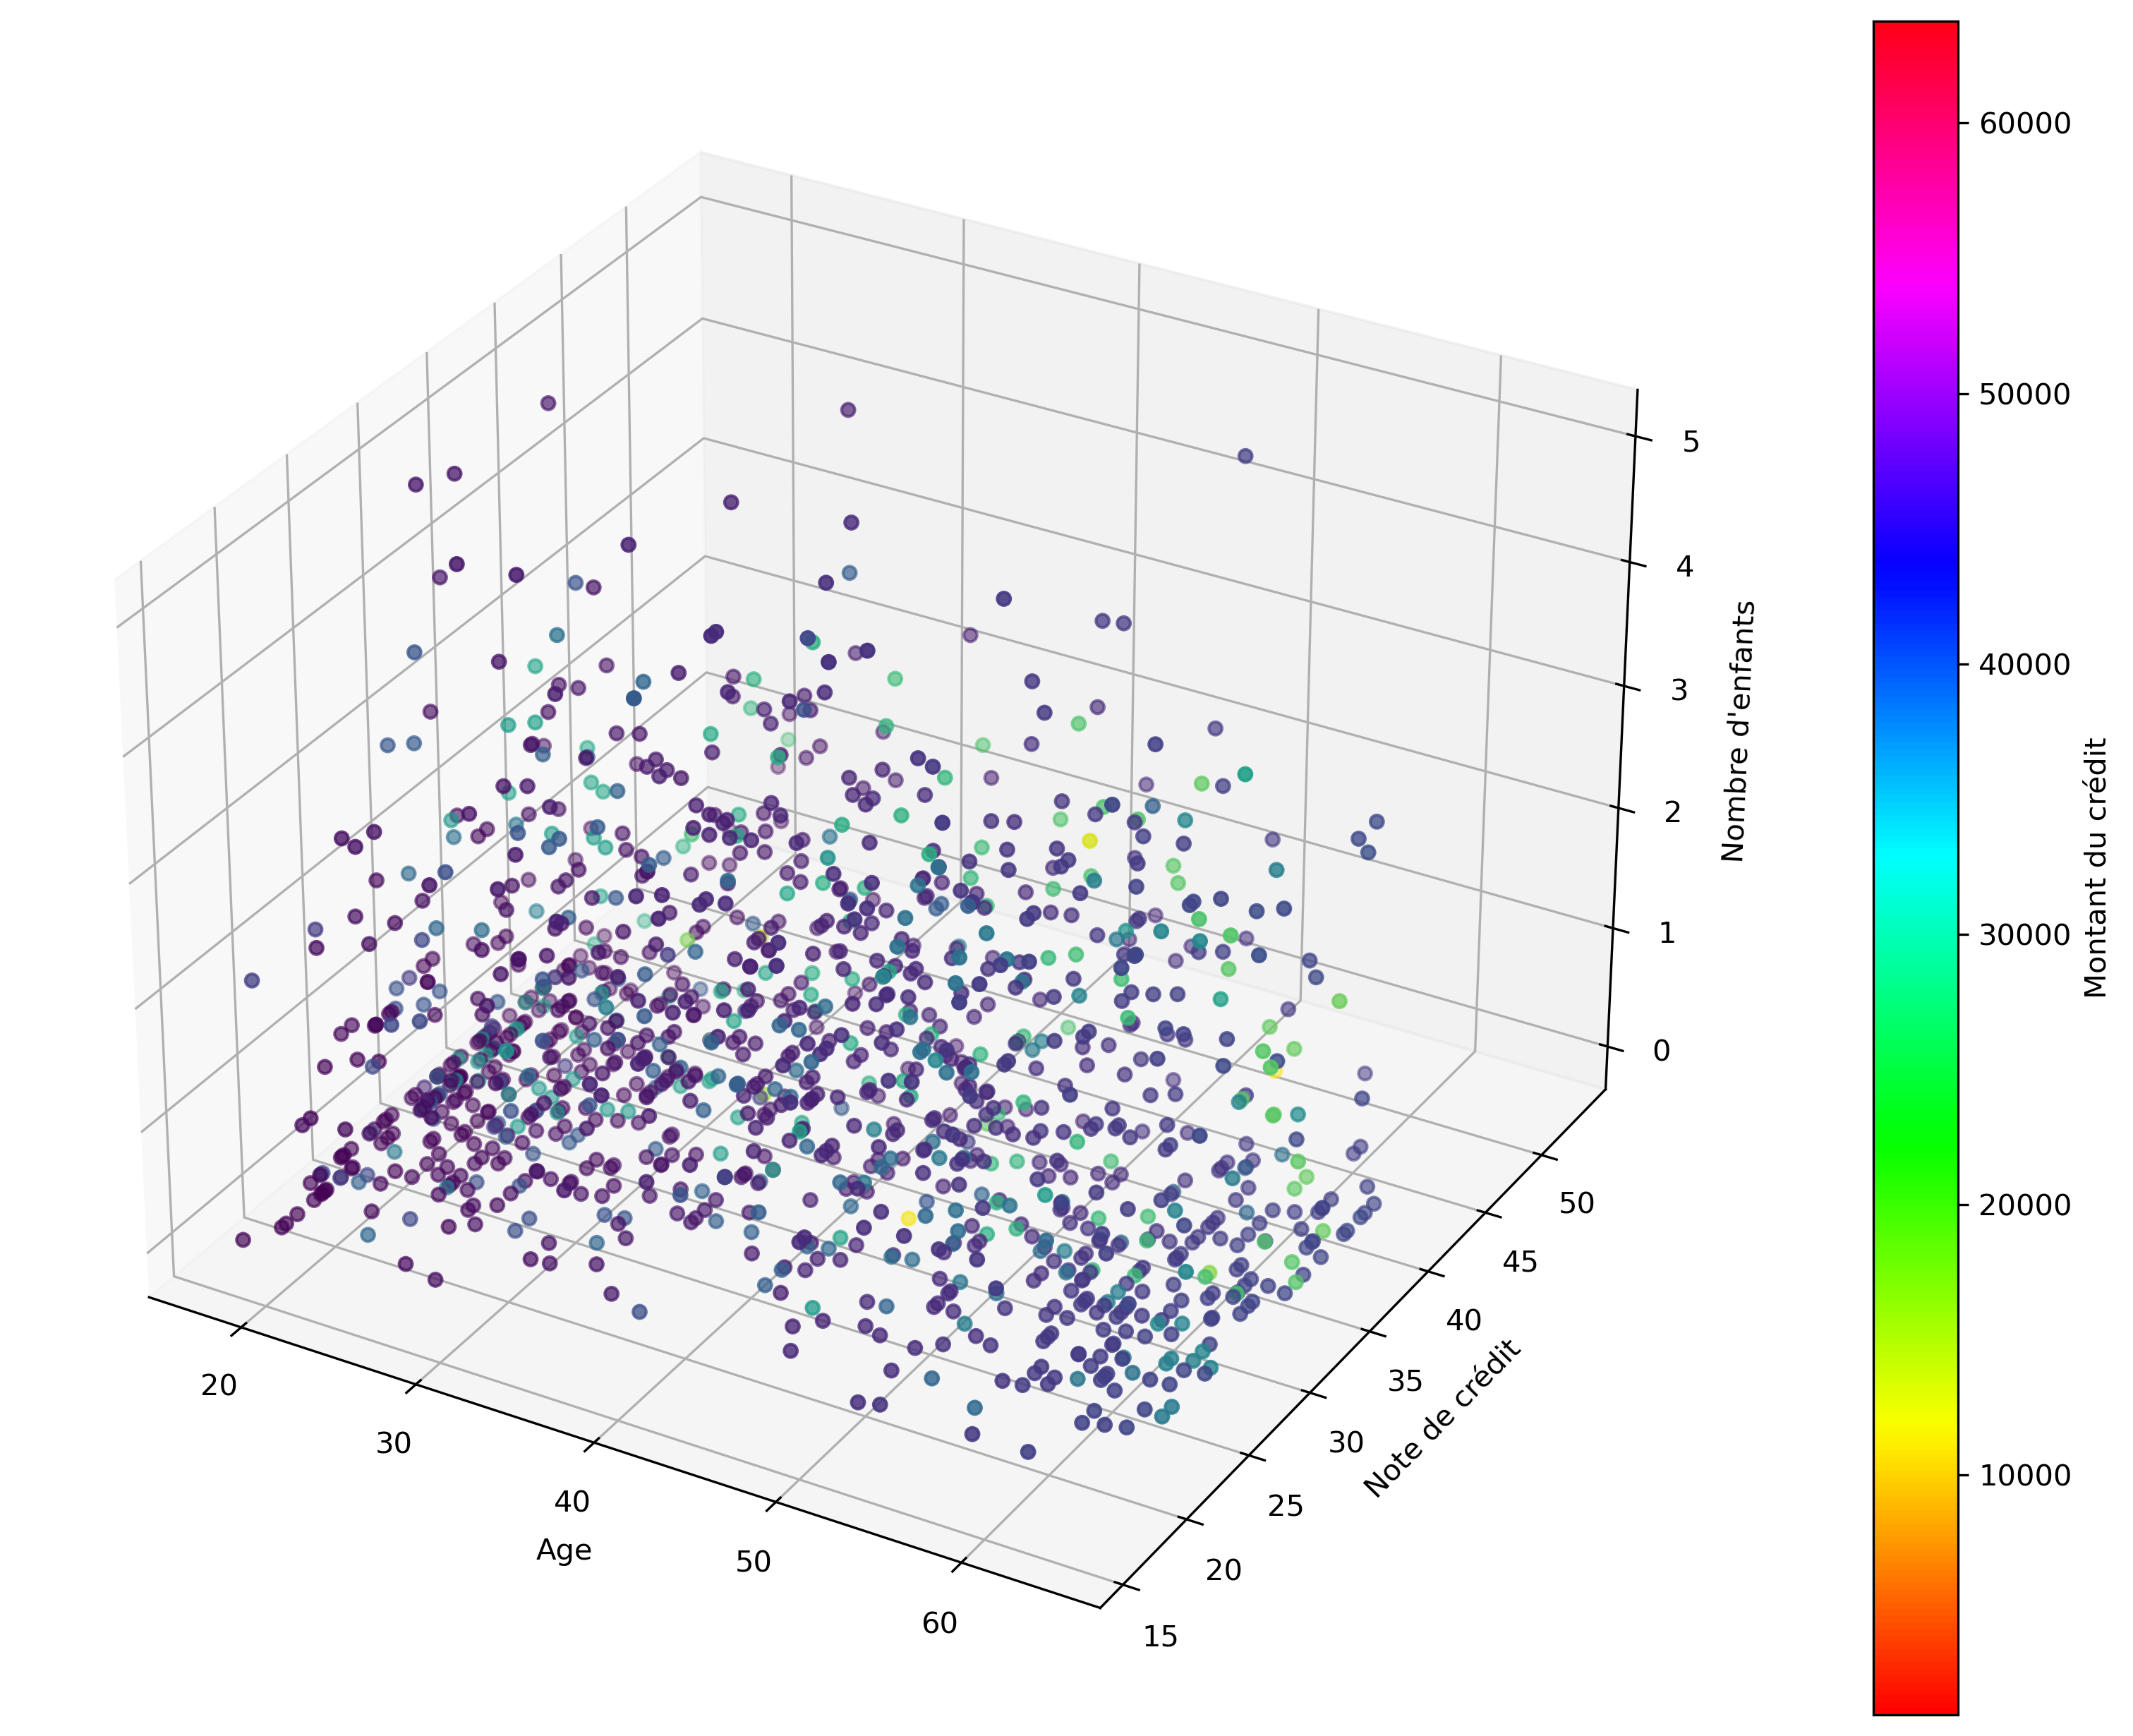

In [41]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

fig = plt.figure(figsize=(15, 8), dpi=300)
ax = Axes3D(fig)

ax.set_xlabel('Age')
ax.set_ylabel('Note de crédit')
ax.set_zlabel('Nombre d\'enfants')

colmap = cm.ScalarMappable(cmap=cm.hsv)
colmap.set_array(credit_df["credit-immo"])

cbar = fig.colorbar(colmap, orientation='vertical')
cbar.set_label('Montant du crédit')

ax.scatter(
    credit_df["age"], # x
    credit_df["note-de-credit"], # y  
    credit_df["nombre-d-enfants"], # z
    marker='o', 
    label="données",
    c=credit_df["credit-immo"] # z"
)

# Phase 3 : Nettoyage / Formattage

On a vu que certaines colonnes avaient des formats inadaptés nous allons donc y remédier et encore une fois nous avons des valeurs aberrantes. Et qui dit valeurs aberrantes dit IQR.

- Calculez l'IQR
- Supprimez les valeurs aberrantes basses et hautes pour chaque feature (toutes les colonnes sauf "credit-immo")

# A vous de coder

Calcul de l'IQR
```python
Q1 = df['nom_de_colonne'].quantile(0.25) # Premier quartile
Q3 = df['nom_de_colonne'].quantile(0.75) # Troisième quartile
IQR = Q3 - Q1 # On calcule IQR
```

1329

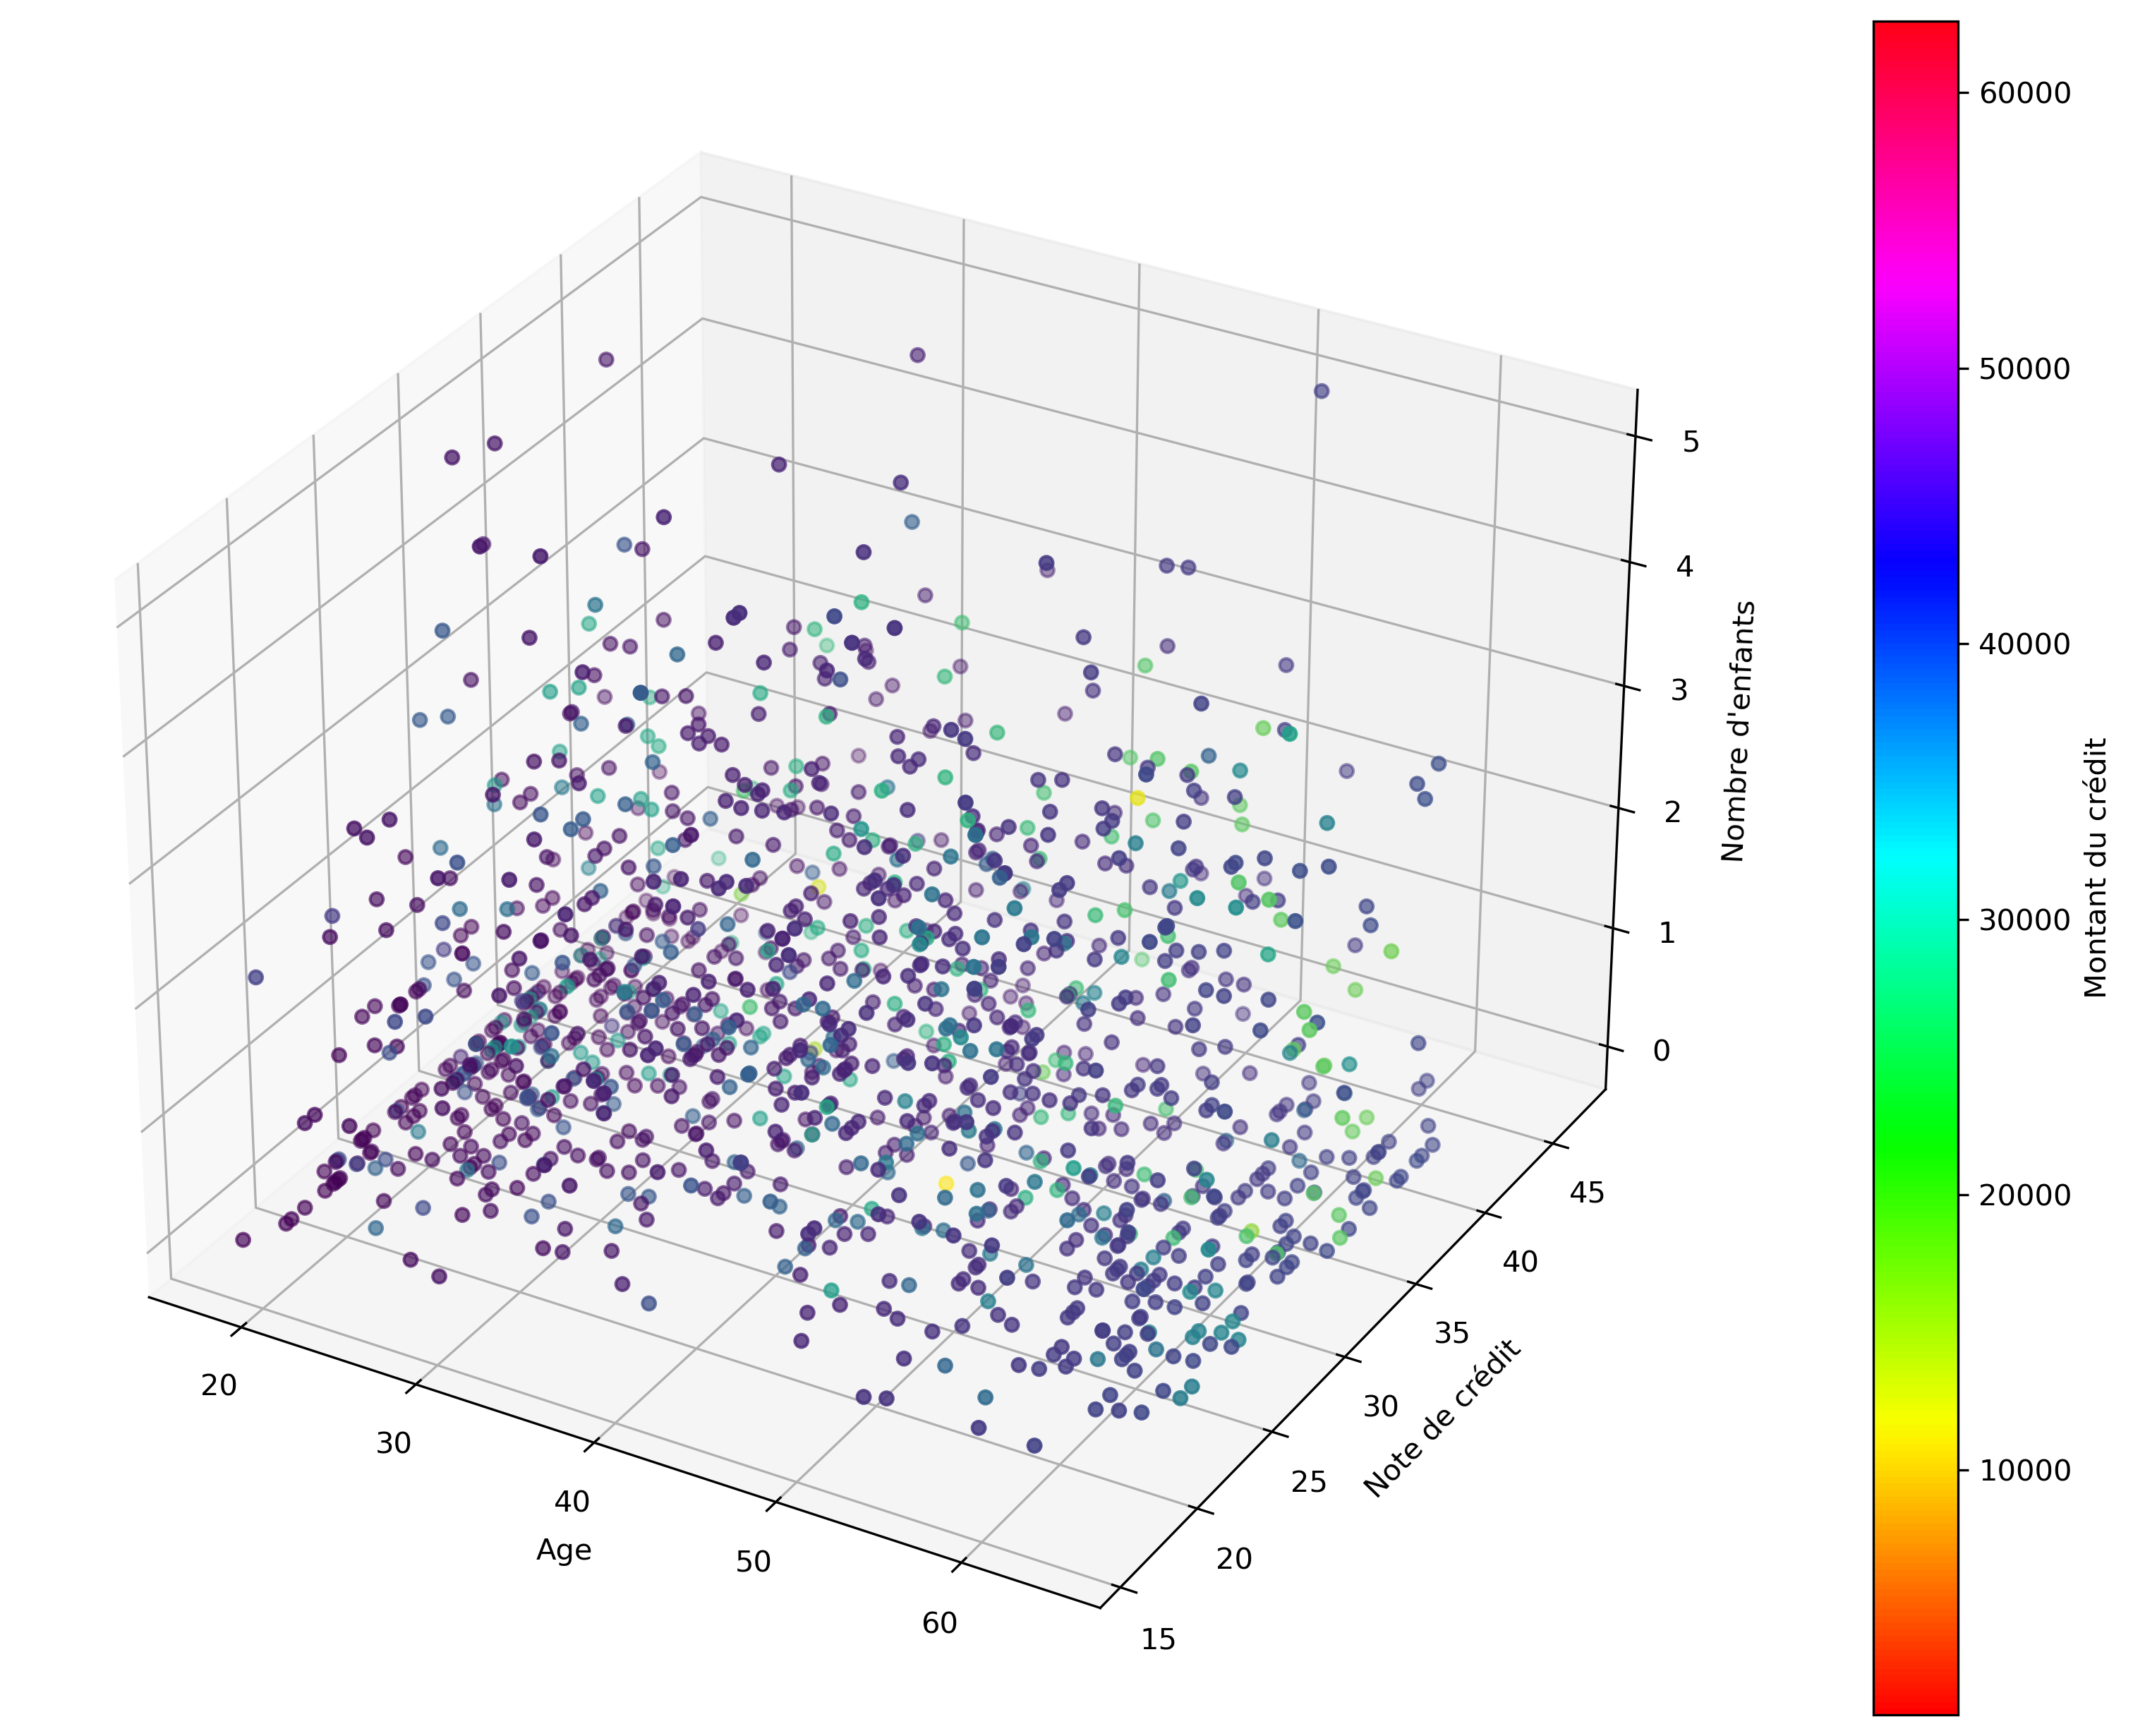

In [54]:
# Supprimez les valeurs aberrantes basses et hautes pour chaque feature (toutes les colonnes sauf "credit-immo")
# Travaillez avec la variable tmp_credit_df

liste_colonnes = ['age', 'note-de-credit', 'nombre-d-enfants']

tmp_credit_df = credit_df.copy()
coeff = 1.5
for col in liste_colonnes:
    Q1 = tmp_credit_df[col].quantile(0.25) # Premier quartile
    Q3 = tmp_credit_df[col].quantile(0.75) # Troisième quartile
    IQR = Q3 - Q1 # On calcule IQR

    tmp_credit_df.query(f'(@Q1 - {coeff} * @IQR) <= `{col}` <= (@Q3 + {coeff} * @IQR)', inplace=True)

display(len(tmp_credit_df))

credit_df = tmp_credit_df
# Maintenant nous allons modifier les colonnes aux valeurs incorrectes
# Arrondir à deux décimales les colonnes "note-de-credit" et "credit-immo"


# Et on réaffiche notre graphique

fig = plt.figure(figsize=(15, 8), dpi=300)
ax = Axes3D(fig)

ax.set_xlabel('Age')
ax.set_ylabel('Note de crédit')
ax.set_zlabel('Nombre d\'enfants')

colmap = cm.ScalarMappable(cmap=cm.hsv)
colmap.set_array(credit_df["credit-immo"])

cbar = fig.colorbar(colmap, orientation='vertical')
cbar.set_label('Montant du crédit')

ax.scatter(
    credit_df["age"], # x
    credit_df["note-de-credit"], # y  
    credit_df["nombre-d-enfants"], # z
    marker='o', 
    label="données",
    c=credit_df["credit-immo"]
)

Que constatez-vous ?

# Phase 4 : Modélisation

Nous allons utiliser scikit-learn et la régression linéaire via la ligne de code suivante `from sklearn.linear_model import LinearRegression, HuberRegressor`.
Nous allons donc tester deux modèles en même temps, et nous allons également utiliser la fonction `train_test_split` pour valider notre modèle et comparer avec les prédictions.

In [99]:
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
 
scale = StandardScaler()
X_scaled = scale.fit_transform(credit_df[["note-de-credit", "nombre-d-enfants", "age"]])

liste_entrees = credit_df[["note-de-credit", "nombre-d-enfants", "age"]] # 
sortie = credit_df['credit-immo']

display(X_scaled, liste_entrees)

taux_donnees_test = 0.3
X_entrainement, X_test, y_entrainement, y_test = train_test_split(
    liste_entrees, 
    sortie,
    random_state=1, # On veut limiter l'aléatoire du split, ça sera plus simple pour comparer les données
    shuffle=False,
    test_size=taux_donnees_test)

array([[-0.44613923, -0.90793956, -1.43876391],
       [ 1.9553095 , -0.07976408, -1.50997605],
       [ 0.41453459,  1.57658687, -0.79785463],
       ...,
       [ 1.06425895, -0.90793956, -1.50997605],
       [-0.80053434, -0.90793956, -1.29633963],
       [-0.24869053, -0.90793956,  1.55214607]])

note-de-credit  nombre-d-enfants  age
0             27.900                 0   19
1             42.130                 1   18
2             33.000                 3   28
3             22.705                 0   33
4             28.880                 0   32
...              ...               ...  ...
1333          30.970                 3   50
1334          31.920                 0   18
1335          36.850                 0   18
1336          25.800                 0   21
1337          29.070                 0   61

[1329 rows x 3 columns]

In [108]:
reg_lineaire = LinearRegression()
reg_lineaire.fit(X_entrainement, y_entrainement)

reg_lineaire_pred = reg_lineaire.predict(X_test)

# On stocke le score de notre modèle pour comparer sa performance face à un autre modèle
score_reg_lin = round(reg_lineaire.score(X_entrainement, y_entrainement) * 100, 2)
display(f"Score de notre modèle: {score_reg_lin}%")

liste_predictions = pd.DataFrame({'Cible': y_test, 'Predicted (linear)': reg_lineaire_pred})
#liste_predictions.sort_values('Cible', inplace=True)
display(liste_predictions)

'Score de notre modèle: 12.92%'

Cible  Predicted (linear)
936   32108.66282        14160.726192
937    8965.79575        12281.115937
938    2304.00220         6397.680029
939    9487.64420        15688.899669
940    1121.87390         4791.454955
...           ...                 ...
1333  10600.54830        16432.851922
1334   2205.98080         7415.388293
1335   1629.83350         8900.576738
1336   2007.94500         6343.869590
1337  29141.36030        17624.487689

[399 rows x 2 columns]

Que constatez-vous ?

In [83]:
reg_huber = HuberRegressor()
reg_huber.fit(X_entrainement, y_entrainement)

display(f"Le coefficient directeur est {reg_huber.coef_}") # a de ax + b
display(f"L'ordonnée à l'origine est {reg_huber.intercept_}") # b de ax +b 

score_reg_huber = round(reg_huber.score(X_entrainement, y_entrainement) * 100, 2)
display(f"Score de notre modèle: {score_reg_huber}%")

reg_huber_pred = reg_huber.predict(X_test)

liste_predictions['Predicted (huber)'] = reg_huber_pred
display(liste_predictions)

'Le coefficient directeur est [ -3.07122617 417.51530498 270.2197096 ]'

"L'ordonnée à l'origine est -3492.659596138084"

'Score de notre modèle: -10.38%'

Cible  Predicted (linear)  Predicted (huber)
936   32108.66282        14160.726192        9140.715326
937    8965.79575        12281.115937        9059.085149
938    2304.00220         6397.680029        2125.921085
939    9487.64420        15688.899669       10738.445265
940    1121.87390         4791.454955        1300.012017
...           ...                 ...                ...
1333  10600.54830        16432.851922       11175.755924
1334   2205.98080         7415.388293        1273.261637
1335   1629.83350         8900.576738        1258.120492
1336   2007.94500         6343.869590        2102.716670
1337  29141.36030        17624.487689       12901.462145

[399 rows x 3 columns]

Que constatez-vous ?

Il semblerait que nous utilisions pas le bon modèle car ni HuberRegressor, ni LinearRegression semblent nous donner de bons résultats, nous allons donc devoir utiliser un autre modèle. Nous allons utiliser la version regressive de la forêt d'arbres qui est cette fois-ci régressive.

In [84]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor()
regr.fit(X_entrainement, y_entrainement)

score_regr = round(regr.score(X_entrainement, y_entrainement) * 100, 2)
display(f"Score de notre modèle: {score_regr}%")

regr_pred = regr.predict(X_test)

liste_predictions['Predicted (foret regr)'] = regr_pred

display(liste_predictions.tail(50))

'Score de notre modèle: 84.16%'

Cible  Predicted (linear)  Predicted (huber)  \
1287   5472.44900        10590.561109        6573.220497   
1288  38344.56600        10895.050272        2625.758895   
1289   7147.47280        15186.233099        8709.118449   
1290   7133.90250         9668.616438        7549.449017   
1291  34828.65400         8570.516811        1534.329093   
1292   1515.34490         5563.618459        2110.671146   
1293   9301.89355        13829.241835       10110.924243   
1294  11931.12525        15678.934936       12102.765442   
1295   1964.78000         5297.460229        2261.682925   
1296   1708.92575         5669.614046        1291.059393   
1297   4340.44090         9070.972613        4827.104677   
1298   5261.46945        10642.598011        6175.300916   
1299   2710.82855         6168.273353        1979.961473   
1300  62592.87309        13894.901622        8573.984909   
1301  46718.16325        19492.886689       14418.684206   
1302   3208.78700         6222.893087        3616.466945   
1303  37829.72420        12608.912480        8041.407829   
1304  21259.37795        12100.511025        8616.031297   
1305   2464.61880         7694.443198        2907.479045   
1306  16115.30450         7213.013980        4276.605690   
1307  21472.47880        11297.041870        6738.069451   
1308  33900.65300         8698.944085        3170.082114   
1309   6875.96100        14131.156910        8322.485625   
1310   6940.90985        12259.909052        8193.264195   
1311   4571.41305         9702.147067        5342.604438   
1312   4536.25900        15197.124906        5980.570233   
1313  36397.57600         9221.762702        2369.973948   
1314  18765.87545         9081.412980        5793.827752   
1315  11272.33139         6683.605267        1701.864069   
1316   1731.67700         4262.566554        1578.247627   
1318  19496.71917        15560.753869        7513.133069   
1319   7201.70085        11843.494020        7800.120372   
1320   5425.02335        11571.102311        6041.289675   
1321  28101.33305        17166.394275       13178.976017   
1322  12981.34570        20822.126888       13141.706687   
1323  43896.37630        16849.800241        8567.613417   
1324   4239.89265         9314.165870        5222.014456   
1325  13143.33665        18969.592437       12887.749120   
1326   7050.02130        13878.888827        7755.617003   
1327   9377.90470        15695.562866       10613.831977   
1328  22395.74424         7095.665164        3483.023881   
1329  10325.20600        18890.456774       11275.246583   
1330  12629.16560        16303.253269       12665.841099   
1331  10795.93733         9148.185256        2619.814771   
1332  11411.68500        21083.862348       11674.027408   
1333  10600.54830        16432.851922       11175.755924   
1334   2205.98080         7415.388293        1273.261637   
1335   1629.83350         8900.576738        1258.120492   
1336   2007.94500         6343.869590        2102.716670   
1337  29141.36030        17624.487689       12901.462145   

      Predicted (foret regr)  
1287             8192.589712  
1288             5805.107744  
1289            10349.852495  
1290             9020.219282  
1291            18710.253650  
1292             7958.597467  
1293            12228.070978  
1294            11963.763014  
1295            10650.503744  
1296             2698.357797  
1297             7299.411216  
1298            11121.969674  
1299             3109.667381  
1300            12858.330372  
1301            28487.805579  
1302             6053.949692  
1303            12117.170318  
1304            11799.417316  
1305            15106.351328  
1306             8726.248579  
1307            12610.631307  
1308             9584.649841  
1309             8120.488523  
1310            10907.516408  
1311            12268.988109  
1312             9719.343898  
1313            15746.787929  
1314            10059.945945  
1315             8708.673100  
1316             1363

In [85]:
from sklearn.linear_model import Ridge

clf = Ridge(alpha=1.0)
clf.fit(X_entrainement, y_entrainement)

score_clf = round(clf.score(X_entrainement, y_entrainement) * 100, 2)
display(f"Score de notre modèle: {score_clf}%")

clf_pred = clf.predict(X_test)

liste_predictions['Predicted (ridge)'] = clf_pred

display(liste_predictions)

'Score de notre modèle: 12.92%'

Cible  Predicted (linear)  Predicted (huber)  \
936   32108.66282        14160.726192        9140.715326   
937    8965.79575        12281.115937        9059.085149   
938    2304.00220         6397.680029        2125.921085   
939    9487.64420        15688.899669       10738.445265   
940    1121.87390         4791.454955        1300.012017   
...           ...                 ...                ...   
1333  10600.54830        16432.851922       11175.755924   
1334   2205.98080         7415.388293        1273.261637   
1335   1629.83350         8900.576738        1258.120492   
1336   2007.94500         6343.869590        2102.716670   
1337  29141.36030        17624.487689       12901.462145   

      Predicted (foret regr)  Predicted (ridge)  
936              8420.081385       14160.481342  
937             12224.496328       12280.107934  
938              4274.915174        6397.468373  
939             13167.018952       15689.192184  
940              4019.999146        4791.803464  
...                      ...                ...  
1333            17347.426723       16432.327484  
1334            24896.314826        7415.670444  
1335            27312.824934        8900.821329  
1336             2345.147152        6344.197661  
1337            15113.803047       17624.781448  

[399 rows x 5 columns]

In [110]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=1)
# fit model
model.fit(X_entrainement, y_entrainement)

nkr_pred = clf.predict(X_test)

score_nreg = round(model.score(X_entrainement, y_entrainement) * 100, 2)
display(f"Score de notre modèle: {score_nreg}%")

liste_predictions['Predicted (KNeighborsRegressor)'] = nkr_pred

display(liste_predictions)

'Score de notre modèle: 98.69%'

Cible  Predicted (linear)  Predicted (KNeighborsRegressor)
936   32108.66282        14160.726192                     14160.481342
937    8965.79575        12281.115937                     12280.107934
938    2304.00220         6397.680029                      6397.468373
939    9487.64420        15688.899669                     15689.192184
940    1121.87390         4791.454955                      4791.803464
...           ...                 ...                              ...
1333  10600.54830        16432.851922                     16432.327484
1334   2205.98080         7415.388293                      7415.670444
1335   1629.83350         8900.576738                      8900.821329
1336   2007.94500         6343.869590                      6344.197661
1337  29141.36030        17624.487689                     17624.781448

[399 rows x 3 columns]

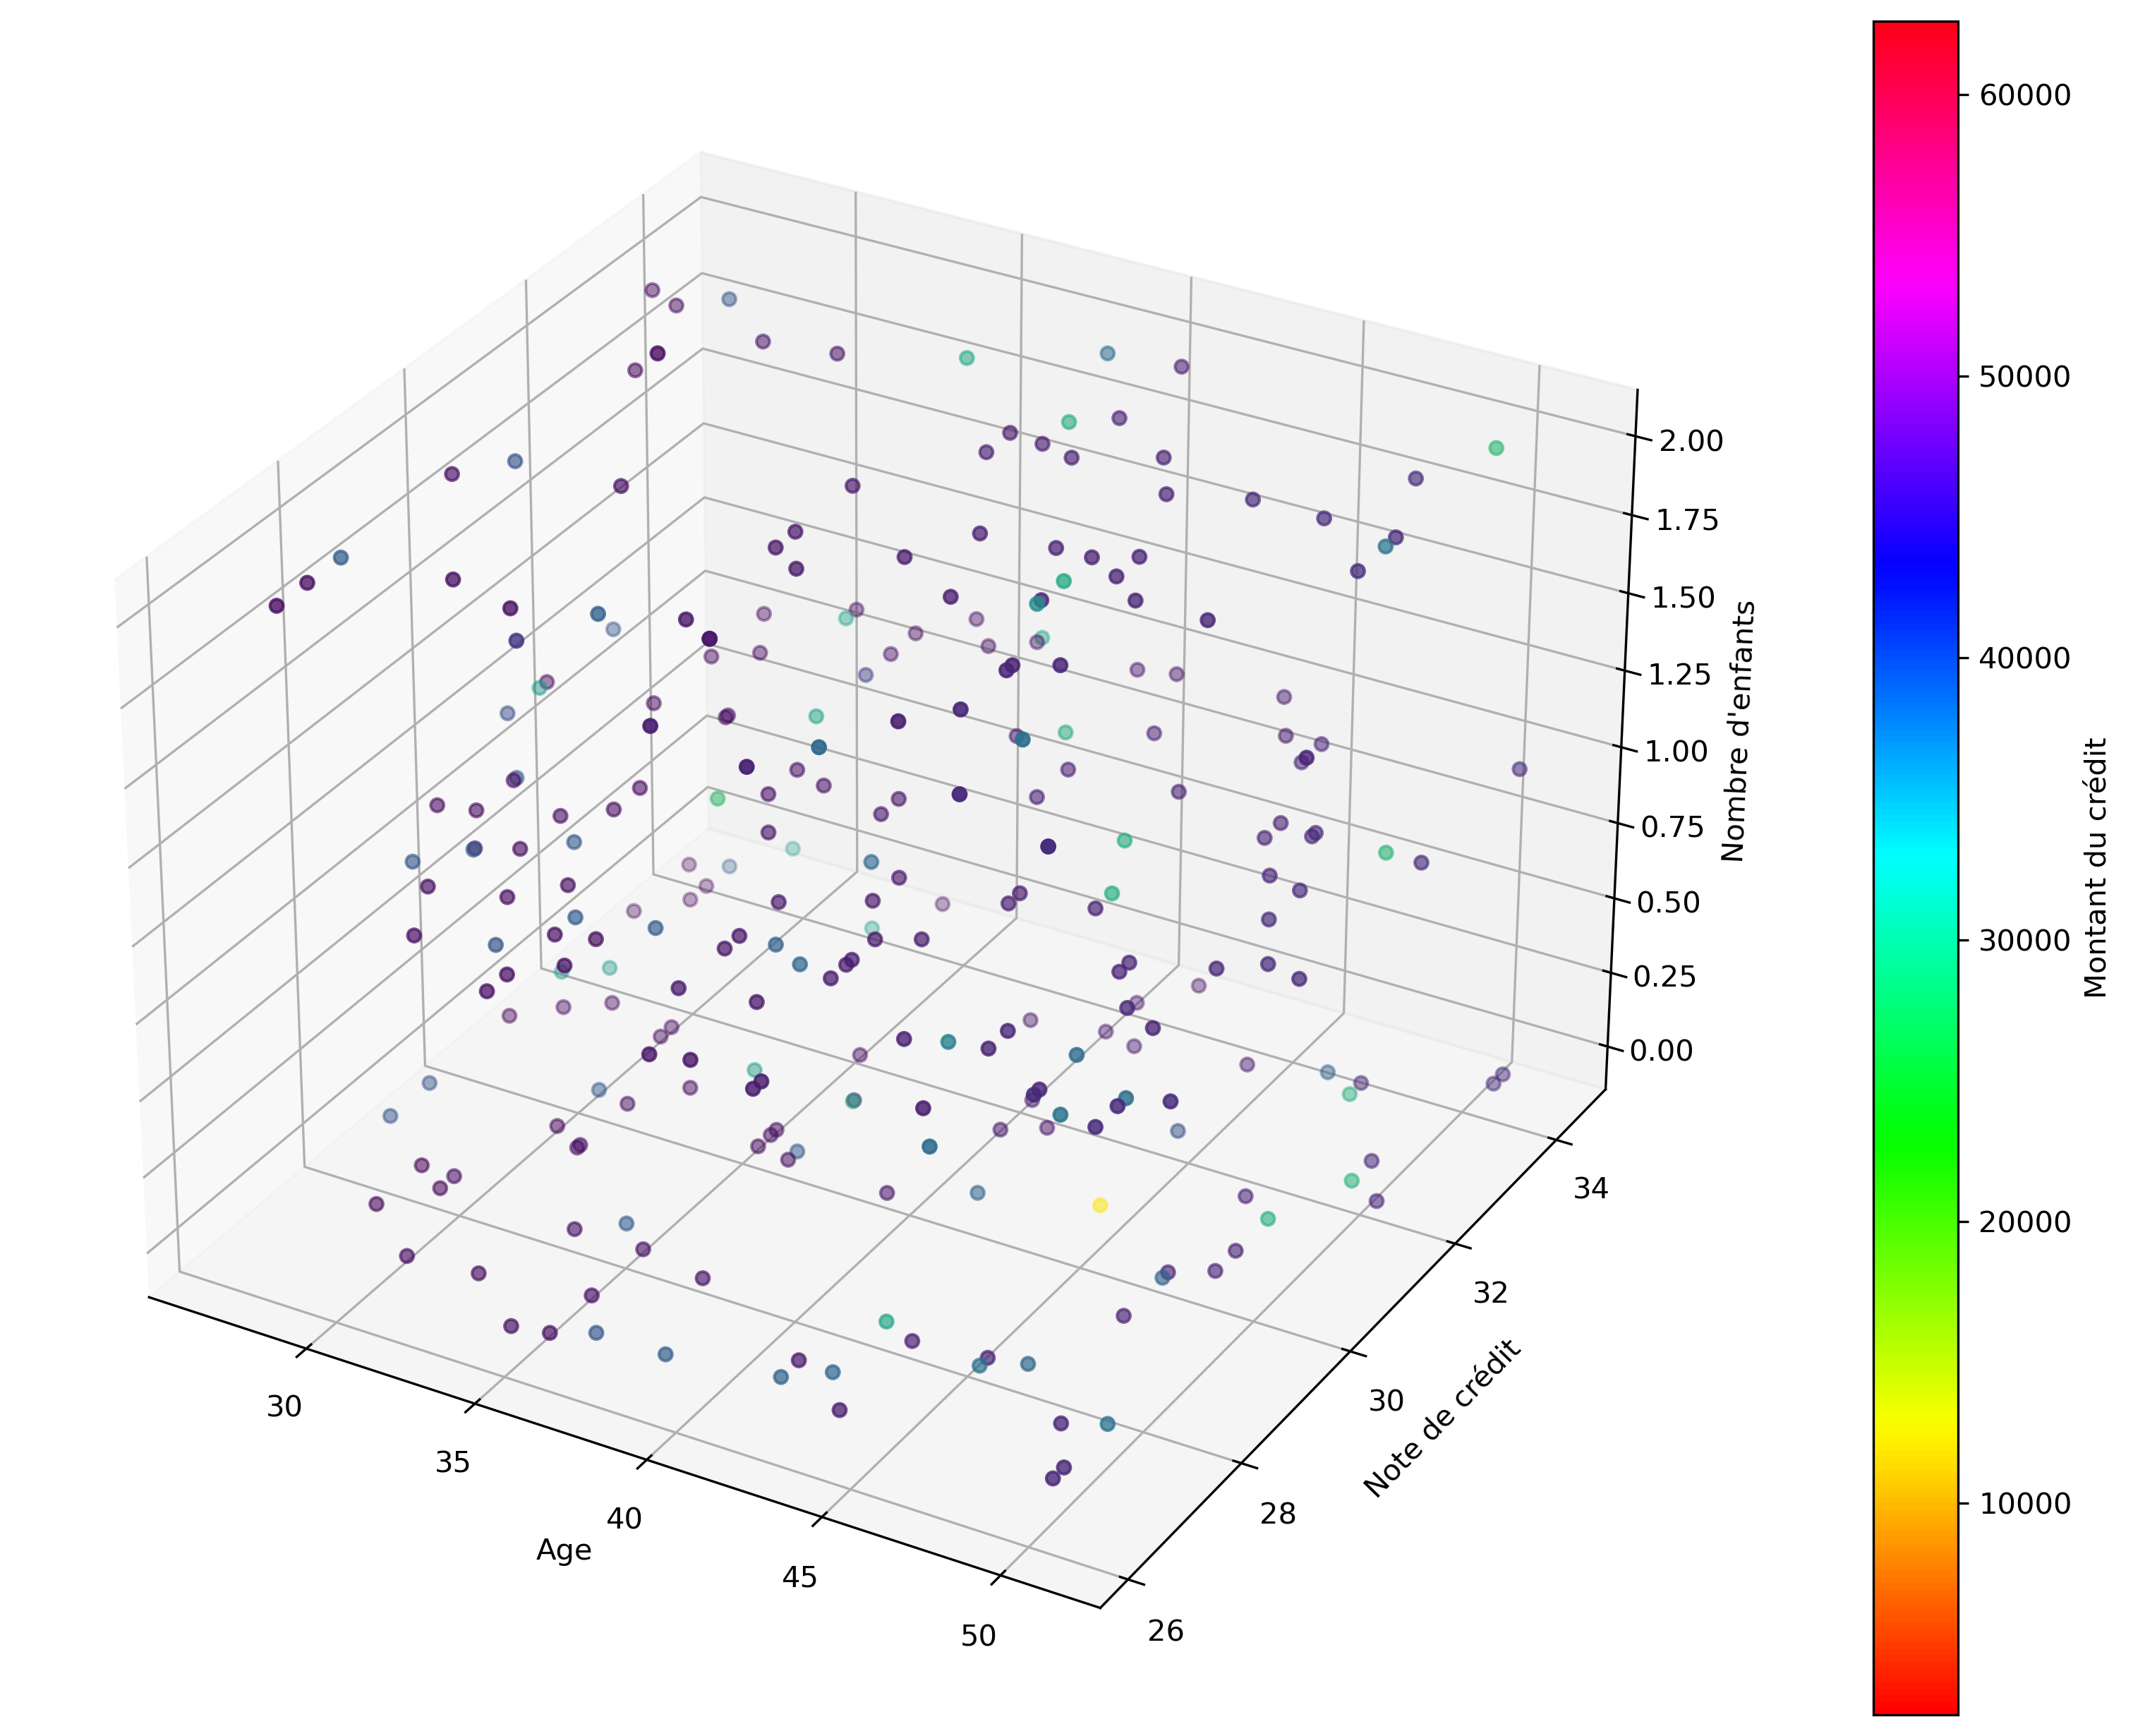

In [37]:
fig = plt.figure(figsize=(15, 8), dpi=300)
ax = Axes3D(fig)

ax.set_xlabel('Age')
ax.set_ylabel('Note de crédit')
ax.set_zlabel('Nombre d\'enfants')

colmap = cm.ScalarMappable(cmap=cm.hsv)
colmap.set_array(credit_df["credit-immo"])

cbar = fig.colorbar(colmap, orientation='vertical')
cbar.set_label('Montant du crédit')

ax.scatter(
    credit_df["age"], # x
    credit_df["note-de-credit"], # y  
    credit_df["nombre-d-enfants"], # z
    marker='o', 
    label="données",
    c=credit_df["credit-immo"]
)
